# Actividades de clase, semanas 4, 5 y 6 

Practica del día 25 de junio, consta de un módulo (módulo III) que corresponde a convoluciones.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

In [2]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Módulo III 

## 1.
Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

[[  0.   0.   0.]
 [  0. 765.   0.]
 [  0.   0.   0.]]
[[  0   0   0]
 [  0 253   0]
 [  0   0   0]]


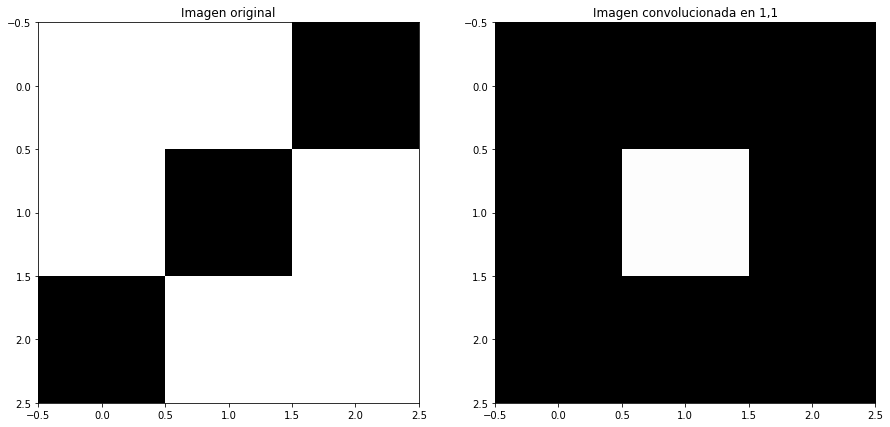

In [34]:
#Se genera un kernel de tamaño size.
#Se devuelve el radio del kernel r.
#Se devuelve el kernel como tal, dividido entre
#la cantidad total de posiciones en este: size^2.

kernel = np.ones((3, 3),dtype=np.float32)*1/2
r = math.floor(3/2)

img = np.array([[255,255,0],[255,0,255],[0,255,255]])
k_size = 3

#Creamos una imagen destino para la convolución, del mismo tamaño que la original.
res = np.zeros(img.shape, dtype=np.float32)

#Para cada píxel se recorre un vecindario con un rango de
#r píxeles a la izquierda, a la derecha, arriba y 
#abajo del mismo.
def apply_kernel(img, res, x,y,kernel,r):
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]

apply_kernel(img, res, 1, 1, kernel, r)
print(res)
res=res.astype(np.uint8)
print(res)

#Generar un subplot 1x2 para mostrar la imagen original y la imagen convolucionada
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen convolucionada en 1,1')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

plt.show()

Conclusión:
Debido a la forma en que opera la convolución, los pixeles de los bordes no se tocan, quedando en negro todos, mientras que el pixel del centro (1,1) es el resultado de la suma de cada pixel circundante multiplicado por 0.5, lo cual da como resultado 765, el cual al convertirse en entero de 8 bits se convierte en 253, lo cual es casi blanco puro.

## 2.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. A continuación, se muestran dos funciones para creación e implementación de kernels.

In [1]:
#Función para hacer el kernel, su parámetro es el tamaño de éste
def make_kernel(size):
    #Matriz de unos del tamaño de entrada, datos de tipo flotante
    kernel = np.ones((size,size),dtype=np.float64)
    #r corresponde al entero más grande que sea menor o igual a size/2
    r = math.floor(size/2)
    return (r,kernel/(size**2))

#Función de aplicación de kernel sobre la imagen bajo los parámetros 
#imagen de entrada, máscara, valores en x,y,kernel,r
def apply_kernel(img, res, x,y,kernel,r):
    #Recorrer la imagen en el intervalo del radio del kernel
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            #Convolución sobre cada pixel de la imagen
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]

## Convolución con las funciones make_kernel y apply_kernel:
Utilizando las funciones anteriores, implemente una convolución a la imagen "res/gato.jpg" con un kernel de <b>tamaño 15x15. </b>

Explique: ¿Qué hace la función make_kernel? ¿Qué hace la función apply_kernel? ¿Por qué considera usted que los bordes se ven de color negro (adquieren valor 0)

### Debe obtener un resultado como este:

<img src = "res/convog.png">


## Convolución con Filter2D:

Utilizando la misma imagen ("res/gato.jpg"), con un kernel de <b> tamaño 15x15 </b>, realice el proceso de convolución, esta vez haga uso de la función cv2.filter2D (utilice el parámetro borderType = cv2.BORDER_REPLICATE).


### Debe obtener un resultado como este:

<img src = "res/conv.png">

# Mida la eficiencia de ambos procesos, utilizando la librería time de python.

¿Cuanto tarda cada caso de convolución implementado?

In [ ]:
### Implementación de la librería time
import time

t0 = time.clock()
##aquí van todos los procesos que usted desea cuantificar
print (time.clock()-t0,"seconds")

## 3.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. En este ejercicio usted debe recrear distintos tipos de ruido que se presentan en imágenes.

El ruido es un factor que se encuentra en la mayoría de los problemas de visión artificial, utilizando las funciones de ruido Gaussiano, Pimienta y Poisson, obtenga:

<img src = "res/gatoxf.png">

A continuación se muestra la implementación de las funciones:

In [3]:
#Definir la función ruido gaussiano
def gaussian_noise(img, std):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1       
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

#Definir la función de ruido impulsivo
def sp_noise(img, s_vs_p, amount):
    
    #Obtener los valores de row, col y ch con base en la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    #Crear una copia de la imagen para volverla ruidosa
    noisy = img.copy()
    
    # Salt mode
    
    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * img.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]

    #La imagen evaluada en el vector coords se satura
    noisy[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    #La imagen en el vector coords se satura en color negro
    noisy[coords] = 0
    return noisy

#Definir la función ruido de Poisson
def poisson_noise(img):
    
    #Se aplica el comando de numpy random.poisson a la imagen de entrada
    noisy = np.random.poisson(img) 
    #Los valores deben estar entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

## Sugerencia: Ajuste los parámetros std = 50, s_vs_p =  0.5, amount = 0.05

## No olvide variar los parámetros y observar qué ocurre al hacerlo.

C:\Users\John Bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\John Bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


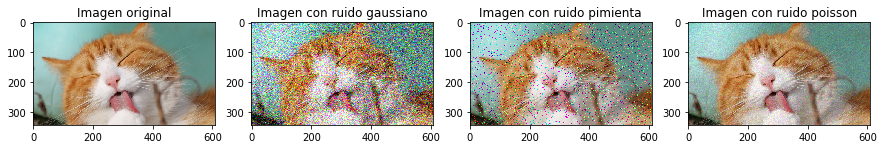

In [67]:
img = cv2.cvtColor(cv2.imread('res/gato.jpg'),cv2.COLOR_BGR2RGB)
img_gaussian = gaussian_noise(img, 50).astype(np.uint8)
img_sp = sp_noise(img, 0.5, 0.05)
img_poisson = poisson_noise(img)

fig, arreglo_plots = plt.subplots(1,4, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen con ruido gaussiano')
arreglo_plots[1].imshow(img_gaussian, vmin=0, vmax=255)

arreglo_plots[2].set_title('Imagen con ruido pimienta')
arreglo_plots[2].imshow(img_sp, vmin=0, vmax=255)

arreglo_plots[3].set_title('Imagen con ruido poisson')
arreglo_plots[3].imshow(img_poisson, vmin=0, vmax=255)

plt.show()

Conclusiones:
- Estas funciones se pueden usar para generar ruido artificialmente, para efectos de tests en los problemas a resolver en nuestro proyecto.
- Al incrementar el parametro std del ruido gaussiano se incrementa el ruido en la imagen reultante.
- El parametro s_vs_p del ruido sal y pimienta parece cambiar el color de los puntos de ruido, acepta valores entre 0 y 1, con 0 se va mas hacia el azul y con 1 se va mas hacia el amarillo.
- El parametro amount de sal y pimienta incrementa la cantidad de ruido resultante. Parece aceptar cualquier valor, pero valores muy grandes tardan mucho y la imagen se torna de un solo color (generalmente azul, pero si s_vs_p es 1 se torna amarillo)

## 4.

Lea la imagen 'res/rice.png'. Aplique 100 veces sucesivas un filtro de media de 3x3 a la imagen. ¿Qué resultado obtuvo?, ¿Qué comentarios puede hacer al respecto?

Ahora aplique 100 veces un filtro de media de 11x11 a la imagen. Compare y discuta los resultados obtenidos comparados con la imagen anterior.

¿Qué ocurre si el filtro 3x3 se aplica únicamente 2 veces? ¿Qué ocurre con 10? ¿Qué pasaría si se aplica un filtro de media infinitas veces a la imagen? 

## Ayuda:

Cuando aplique 100 veces el filtro de media 3x3 debe obtener lo siguiente:

<img src = "res/scenario.png">

###  Implementación del filtro:

In [ ]:
####Implementación 100 veces filtro####
#tamaño del kernel
k_size = 3
#crear el kernel
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
#crear imagen que se va a modificar las n veces que se aplique el filtro
res2 = img.copy()
#ciclo que implementa el filtro de media
for i in range(0,100):
    res2 = cv2.filter2D(res2, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

## 5.

Utilice la función de ruido sal y pimienta (sp_noise), con s_vs_p = amount = 0.7.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", introduzcala en la función de ruido pimienta y posteriomente, aplique un filtro de mediana con kernel de tamaño 7x7.

<img src = "res/filter.png">

Recuerde utilizar la función cv2.medianBlur.

In [ ]:
## Inserte codigo aquí